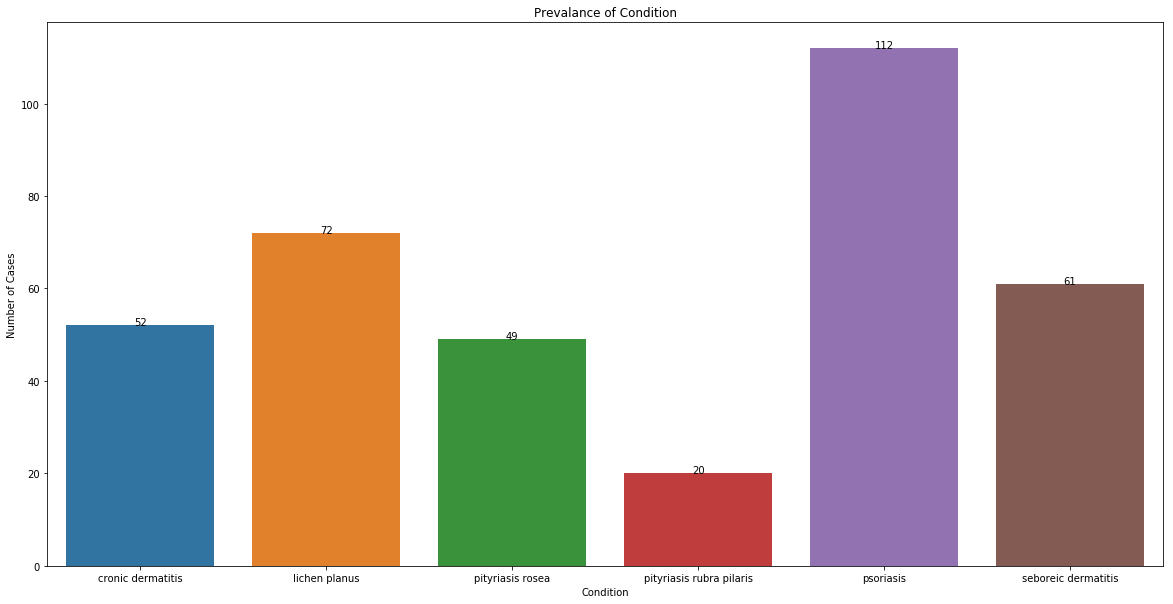

In [64]:
#Exploration of dermatology dataset
#1) How prevalant is each class i.e. compare number of cases for psoriasis, cronic dermatitis etc
#2) How prevalant is each class by age group
#3) How severe is each condition by age group

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#readfile
df = pd.read_csv('dermatology.csv')

#sort by class and age
df = df.sort_values(by=['class', 'age'])

#fill nulls with 0
df = df.fillna(0)

#create desription for class code
def class_desc (row):
    if row['class'] == 1 :
        return 'psoriasis'
    elif row['class'] == 2 :
        return 'seboreic dermatitis'
    elif row['class'] == 3 :
        return 'psoriasis'
    elif row['class'] == 4 :
        return 'pityriasis rosea'
    elif row['class'] == 5 :
        return 'cronic dermatitis'
    elif row['class'] == 6 :
        return 'pityriasis rubra pilaris'
    else:
        return 'other'
        
#create new column in dataframe for class description        
df['class_desc'] = df.apply (lambda row: class_desc(row), axis=1)

#bar chart to show Prevalance of Condition
fig = plt.subplots(figsize=(20,10))

#Countplot
#ax = sns.countplot(x='class_desc',data=df)
#ax.set_xticklabels(graph.get_xticklabels(),rotation=90)
#ax.set(title="Prevalance of Condition")
#ax.set(xlabel="Condition")
#ax.set(ylabel="Number of Cases")
#to add labels / annotate
#for index, row in groupedvalues.iterrows():
#    ax.text(row.name,row.age, round(row.age,2), color='black', ha="center")

#barplot
groupedvalues=df.groupby('class_desc').count().reset_index() #.sort_values('class_desc')
#print(groupedvalues.head(1))
ax = sns.barplot(x='class_desc',y='age',data=groupedvalues)
ax.set(title="Prevalance of Condition")
ax.set(xlabel="Condition")
ax.set(ylabel="Number of Cases")
#to add labels / annotate
for index, row in groupedvalues.iterrows():
    ax.text(row.name,row.age, round(row.age,2), color='black', ha="center")

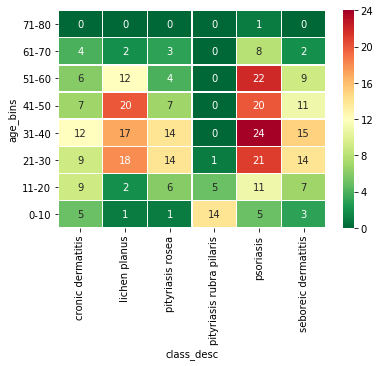

In [66]:
#Show Incidence of class by age group

#create bins and bin labels
cut_labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80']
cut_bins = [-1, 10, 20, 30, 40, 50, 60, 70,80]

#create new column for ag bins
df['age_bins'] = pd.cut(df['age'], bins=cut_bins, labels=cut_labels, include_lowest=True)


df_pivot = pd.pivot_table(df,values='class',index='age_bins', columns='class_desc', aggfunc=len, fill_value=0)
df_pivot.sort_index(level=0, ascending=False, inplace=True)

#Incidence of condition by age group
sns.heatmap(df_pivot, cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [67]:
#print(df.shape)
#print(df.columns)

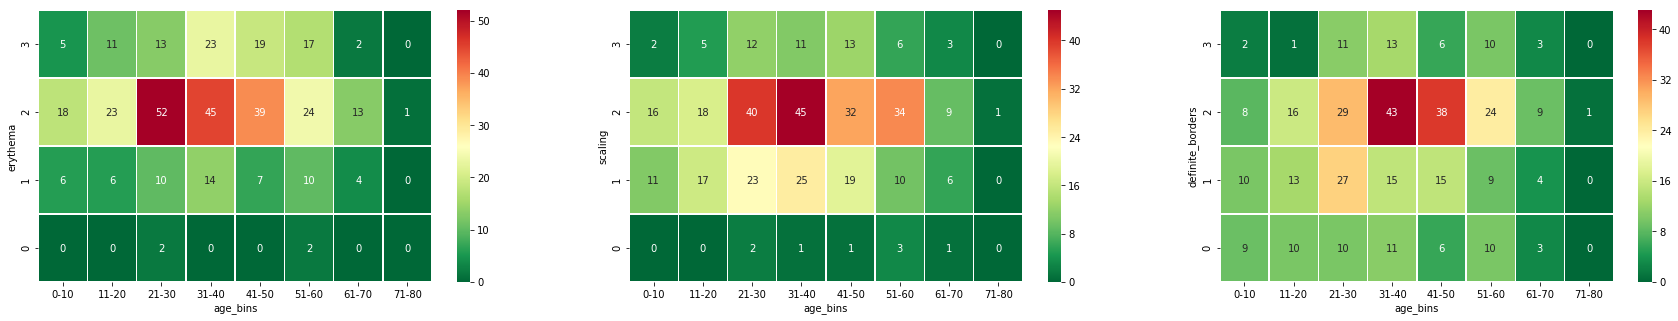

In [76]:
#Severity of each condition by age group

df_erythema = df[['erythema','age_bins']]
df_erythema = df_erythema.sort_values(by=['erythema'])

df_scaling = df[['scaling','age_bins']]
df_scaling = df_scaling.sort_values(by=['scaling'])

df_definite_borders = df[['definite_borders','age_bins']]
df_definite_borders = df_definite_borders.sort_values(by=['definite_borders'])


#create pivot tables
df_erythema = pd.pivot_table(df_erythema, index='erythema', columns='age_bins', aggfunc=len, fill_value=0)
df_scaling = pd.pivot_table(df_scaling, index='scaling', columns='age_bins', aggfunc=len, fill_value=0)
df_definite_borders = pd.pivot_table(df_definite_borders, index='definite_borders', columns='age_bins', aggfunc=len, fill_value=0)

#Sort and plot
df_erythema.sort_index(level=0, ascending=False, inplace=True)
df_scaling.sort_index(level=0, ascending=False, inplace=True)
df_definite_borders.sort_index(level=0, ascending=False, inplace=True)

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(30, 5), sharex=True)
sns.heatmap(data=df_erythema, cmap='RdYlGn_r', linewidths=0.5, annot=True, ax=axs[0])
sns.heatmap(data=df_scaling, cmap='RdYlGn_r', linewidths=0.5, annot=True, ax=axs[1])
sns.heatmap(data=df_definite_borders, cmap='RdYlGn_r', linewidths=0.5, annot=True, ax=axs[2])


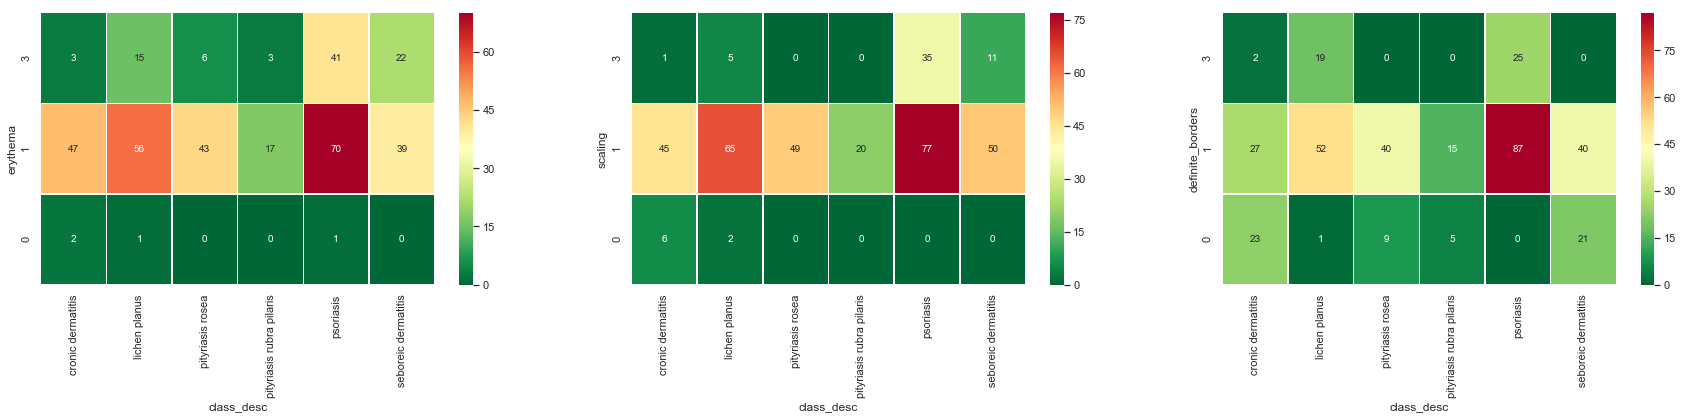

In [66]:
#Create new dataframe with subset of columns. If you do not get copy() then you can get a "Setting with copy" warning when you change data
df_erythema_class = df[['erythema','class_desc']].copy() 
df_scaling_class = df[['scaling','class_desc']].copy() 
df_definite_borders_class = df[['definite_borders','class_desc']].copy() 

#print(df_erythema_class['erythema'].unique())

#replace 2 with 1 in a single column as they need to be grouped together. Two ways of replacing
df_erythema_class['erythema'] = df_erythema_class['erythema'].replace(2, 1)
df_scaling_class['scaling'] = df_scaling_class['scaling'].replace(2, 1)
df_definite_borders_class['definite_borders'] = df_definite_borders_class['definite_borders'].replace(2, 1)
#df_erythema_class.loc[df_erythema_class.erythema == 2, 'erythema'] = 1

#sort data
df_erythema_class = df_erythema_class.sort_values(by=['erythema'])
df_scaling_class = df_scaling_class.sort_values(by=['scaling'])
df_definite_borders_class = df_definite_borders_class.sort_values(by=['definite_borders'])

#limit data by condition
#df_erythema_class = df_erythema_class[df_erythema_class['class_desc']=='psoriasis']


#Verify number of rows and columns in dataframe
#print(df_erythema_class.shape)
#print(df_erythema_class.columns)
#print(df_erythema_class['erythema'].unique())
#print(df_erythema_class['class_desc'].unique())

df_erythema_class = pd.pivot_table(df_erythema_class, index='erythema', columns='class_desc', aggfunc=len, fill_value=0)
df_scaling_class = pd.pivot_table(df_scaling_class, index='scaling', columns='class_desc', aggfunc=len, fill_value=0)
df_definite_borders_class = pd.pivot_table(df_definite_borders_class, index='definite_borders', columns='class_desc', aggfunc=len, fill_value=0)

df_erythema_class.sort_index(level=0, ascending=False, inplace=True)
df_scaling_class.sort_index(level=0, ascending=False, inplace=True)
df_definite_borders_class.sort_index(level=0, ascending=False, inplace=True)

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(30, 5), sharex=True)
sns.heatmap(data=df_erythema_class, cmap='RdYlGn_r', linewidths=0.5, annot=True, ax=axs[0])
sns.heatmap(data=df_scaling_class, cmap='RdYlGn_r', linewidths=0.5, annot=True, ax=axs[1])
sns.heatmap(data=df_definite_borders_class, cmap='RdYlGn_r', linewidths=0.5, annot=True, ax=axs[2])
